# Exploratory Analysis of The Financial Analyst Forecast

Qinzheng Xu

Github: https://github.com/xu000112-bit/Analyst

## Project Goals

The goal of this project is to evaluate the trend of financial analyst forecast trend before and after the covid-19.

## Data Source

The data is from the IBES data from crsp database. The link could be found here: https://wrds-www.wharton.upenn.edu/pages/get-data/ibes-thomson-reuters/ . The IBES dataset provides the analyst last name, first name initial, brokage firm, forecast value information beginning at 2000. Our dataset only considers the analyst forecast issues between 2019 to 2021 to investigate analyst forecast trend after and before covid-19. My data also only considers firms within US.

Previous literatures listed many measures to evaluate analyst forecast quality, forecast pessimism and forecast accuracy. I think my next step is following their literature method to get more measures on analyst forecasts.

## Extraction, Transform, and Load (ETL)

In this section, I will load the data that I direct download from IBES database. This data have many columnes, includes analyst last name, first initial, forecast time, forecast value, forecast firm and forecast firm earning announcement time etc...

In [1]:
import pandas as pd
import seaborn as se

data = pd.read_csv("DATA.csv")
data.head(5)

C:\Users\xu000\AppData\Local\Temp\ipykernel_10720\2208440119.py:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("DATA.csv")


,AMASKCD,ANALYST,TICKER,ANALYS,VALUE,FPEDATS,REVDATS,REVTIMS,ANNDATS,ANNTIMS,...,repdats,act,new_value,yearf,monthf,yeara,montha,HSICCD,PRC,RET
0,167443,HOLLAND B,JJSF,167443,0.86,31-Dec-18,28-Jan-19,9:43:08,25-Jan-19,6:32:00,...,28-Jan-19,0.88,0.86,2018,12,2019,1,2052.0,138.44000,-0.003957
1,167443,HOLLAND B,JJSF,167443,1.02,31-Mar-19,28-Jan-19,9:43:08,25-Jan-19,6:32:00,...,29-Apr-19,1.08,1.02,2019,3,2019,1,2052.0,137.41000,-0.012007
2,167443,HOLLAND B,JJSF,167443,1.03,31-Mar-19,9-Apr-19,14:54:49,29-Jan-19,7:01:00,...,29-Apr-19,1.08,1.03,2019,3,2019,1,2052.0,137.41000,-0.012007
3,167443,HOLLAND B,JJSF,167443,1.58,30-Jun-19,29-Jan-19,8:43:21,29-Jan-19,7:01:00,...,29-Jul-19,1.63,1.58,2019,6,2019,1,2052.0,144.96001,-0.056311
4,113704,ANDERSEN J,JJSF,113704,1.00,31-Mar-19,29-Jan-19,13:11:22,29-Jan-19,12:39:00,...,29-Apr-19,1.08,1.00,2019,3,2019,1,2052.0,137.41000,-0.012007


## Exploratory Data Analysis (EDA)

1. Summary Statistics

In [2]:
data.describe()

,AMASKCD,ANALYS,VALUE,permno,act,new_value,yearf,monthf,yeara,montha,HSICCD,PRC
count,794466.000000,794466.000000,794466.000000,794466.000000,794466.000000,794466.000000,794466.000000,794466.000000,794466.000000,794466.000000,771239.000000,771930.000000
mean,114466.922446,114466.922446,0.814372,49511.638660,0.863086,0.796818,2020.062684,7.341560,2020.002704,6.098612,5589.272651,78.656331
std,49571.649482,49571.649482,2.221372,32898.634456,2.648897,4.483125,0.858456,3.372671,0.790529,3.308931,2670.980847,156.119958
min,70.000000,70.000000,-62.330000,10026.000000,-217.490000,-2903.400000,2017.000000,1.000000,2019.000000,1.000000,170.000000,0.103500
25%,79513.000000,79513.000000,0.040000,16188.000000,0.040000,0.040000,2019.000000,4.000000,2019.000000,3.000000,3572.000000,18.490000
50%,117627.000000,117627.000000,0.490000,45306.000000,0.537500,0.490000,2020.000000,6.000000,2020.000000,6.000000,5651.000000,42.200000
75%,151837.000000,151837.000000,1.170000,84788.000000,1.280000,1.170000,2021.000000,9.000000,2021.000000,9.000000,7372.000000,88.860000
max,193860.000000,193860.000000,347.667000,93436.000000,157.780000,347.667000,2022.000000,12.000000,2021.000000,12.000000,9999.000000,5018.100100


1. How many analyst making forecast for each month?

In [3]:
data['ANNDATS2'] = pd.to_datetime(data['ANNDATS'])
data['REVDATS2'] = pd.to_datetime(data['REVDATS'])
data['Year_Quarter'] = pd.to_datetime(data['ANNDATS2']).dt.year*100 + pd.to_datetime(data['ANNDATS2']).dt.quarter
data['Year_Month'] = pd.to_datetime(data['ANNDATS2']).dt.year*100 + pd.to_datetime(data['ANNDATS2']).dt.month
data[["Year_Month", "AMASKCD"]].drop_duplicates().groupby(["Year_Month"]).count()

,AMASKCD
Year_Month,
201901,1627
201902,1728
201903,1603
201904,1714
201905,1815
201906,1366
201907,1787
201908,1848
201909,1436


2. What is average forcast trend?

In [4]:
trend = data[["Year_Month", "new_value"]].drop_duplicates().groupby(["Year_Month"]).mean().reset_index()
trend

,Year_Month,new_value
0,201901,2.076848
1,201902,2.122976
2,201903,1.347369
3,201904,2.060270
4,201905,2.027627
5,201906,1.652946
6,201907,2.342819
7,201908,2.009699
8,201909,1.769138
9,201910,2.235637


We could observe that at March 2020, the forecast is tend to become negative.

<AxesSubplot:ylabel='new_value'>

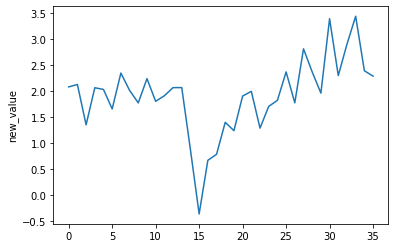

In [5]:
se.lineplot(data = trend, x=trend.index, y="new_value")